In [67]:
!pip install gif
!wget https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/gif_utils.py
import gif, gif_utils
import matplotlib.pyplot as plt

@gif.frame
def plot_f(X, y, yhat, loss):
  plt.figure(figsize=(8, 6))
  plt.scatter(X.numpy(), y.numpy(), color='blue')
  plt.plot(X.numpy(), yhat.detach().numpy(), color='red')
  plt.ylim(0,20)
  plt.title(f'Step {i}: loss={loss.item():.2f}')
  plt.xlabel('X')
  plt.ylabel('Y')

@gif.frame
def plot_gd(X, y, yhat, loss):
  plt.figure(figsize=(5, 4))
  plt.scatter(yhat, y)
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='y=x line')
  plt.title(f'Step {i}: loss={loss.item():.2f}')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')


/bin/bash: /usr/local/bin/pip: /usr/bin/python: bad interpreter: No such file or directory
--2025-10-22 12:29:32--  https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/gif_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1591 (1.6K) [text/plain]
Saving to: ‘gif_utils.py.19’

gif_utils.py.19     100%[===================>]   1.55K  --.-KB/s    in 0s      

2025-10-22 12:29:32 (28.6 MB/s) - ‘gif_utils.py.19’ saved [1591/1591]



In [68]:
import torch
import numpy as np

In [69]:
# Create a tensor with python list
x = torch.tensor([1.0, 2.0, 3.0])
x

tensor([1., 2., 3.])

In [70]:
# Get the shape and datatype of a tensor
x.shape, x.dtype

(torch.Size([3]), torch.float32)

In [71]:
# Interchange between numpy arrays and pytorch tensors
import numpy as np
y = torch.tensor(np.array([2.0, 3.0, 4.0]))
print(y)

z = torch.from_numpy(np.array([0.0, 1.0, 2.0]))
print(z)

print(y.numpy())
print(z.numpy())

tensor([2., 3., 4.], dtype=torch.float64)
tensor([0., 1., 2.], dtype=torch.float64)
[2. 3. 4.]
[0. 1. 2.]


In [72]:
# Create a multi-dimensional tensor
m = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(m)

# Zero and one tensors
torch.zeros(2, 3), torch.ones(2, 3)

tensor([[1, 2, 3],
        [4, 5, 6]])


(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]))

In [73]:
# Tensors filled with random values from 0 to 1
torch.random.manual_seed(42) # So that you see the same result :)
torch.rand(2, 3)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [74]:
x,y

(tensor([1., 2., 3.]), tensor([2., 3., 4.], dtype=torch.float64))

In [75]:
#Basic operations
# Addition
print(x + y) # Notice the datatype of the result

# Subtraction
print(x - y)

# Multiplication (pairwise product)
print(x * y)

# Division
print(x / y)

# Exponentiation
print(x ** y)

tensor([3., 5., 7.], dtype=torch.float64)
tensor([-1., -1., -1.], dtype=torch.float64)
tensor([ 2.,  6., 12.], dtype=torch.float64)
tensor([0.5000, 0.6667, 0.7500], dtype=torch.float64)
tensor([ 1.,  8., 81.], dtype=torch.float64)


In [76]:
# max/min/mean
x = torch.tensor([[1.,2.,3.], [8.,9.,10.]])
print(x.max(), x.min(), x.mean())

x_arr = np.array([[1.,2.,3.], [8.,9.,10.]])
print(x_arr.max(), x_arr.min(), x_arr.mean())

tensor(10.) tensor(1.) tensor(5.5000)
10.0 1.0 5.5


In [77]:
print(m)
transpose = m.T
#transpose.view(-1,1)

transpose.reshape(-1,1)

tensor([[1, 2, 3],
        [4, 5, 6]])


tensor([[1],
        [4],
        [2],
        [5],
        [3],
        [6]])

In [78]:
m = torch.tensor([[1, 4, 6], [2, 5, 3]], dtype=torch.float32)
column_mean = torch.mean(m, dim=0)
row_mean = torch.mean(m, dim=1)
global_mean = torch.mean(m)
column_mean, row_mean, global_mean

(tensor([1.5000, 4.5000, 4.5000]), tensor([3.6667, 3.3333]), tensor(3.5000))

In [79]:
m = torch.rand(2, 2, 3) # 2 slices, each size being 2 * 3
print(m)

print(m[:,1,:]) # Second row, all columns of all slices

tensor([[[0.2566, 0.7936, 0.9408],
         [0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411],
         [0.4294, 0.8854, 0.5739]]])
tensor([[0.1332, 0.9346, 0.5936],
        [0.4294, 0.8854, 0.5739]])


In [80]:
m[-1, :, 1:] # Last slice, all rows, column starting from the second column

tensor([[0.5677, 0.7411],
        [0.8854, 0.5739]])

In [81]:
# Concatenations
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])
print(torch.cat((x, y)))

# vstack: stack vertically (row-wise)
print(torch.vstack((x, y)))

# hstack: stack horizontally (column-wise)
print(torch.hstack((x, y)))

tensor([1., 2., 3., 4., 5., 6.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [82]:
# Matrix multiplication
A = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)
B = torch.tensor([[5, 6, 7, 8], [7, 8, 9, 10]], dtype=torch.float32)
A.shape, B.shape

(torch.Size([3, 2]), torch.Size([2, 4]))

In [83]:
# Use @ or matmul for matrix multiplication
A @ B, torch.matmul(A, B)

(tensor([[ 19.,  22.,  25.,  28.],
         [ 43.,  50.,  57.,  64.],
         [ 67.,  78.,  89., 100.]]),
 tensor([[ 19.,  22.,  25.,  28.],
         [ 43.,  50.,  57.,  64.],
         [ 67.,  78.,  89., 100.]]))

In [84]:
A = torch.tensor([1,1,1])
B = torch.tensor([2,2,2])
A @ B

tensor(6)

In [85]:
# Dot product between 1D vectors with `dot` function
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
torch.dot(x, y)

tensor(32)

In [86]:
# Convert datatype for tensors
x = torch.tensor([1.0, 2.0, 3.0])
x.dtype

torch.float32

In [87]:
# Use `to` to convert type
x = x.to(torch.int32)
x.dtype

torch.int32

In [88]:
# Gradient for addition
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) # Set requires_grad = True to let pytorch track the gradient
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

z = x**2 + y # Now z has gradient w.r.t x
z.sum().backward() # Do "backpropagation," pytorch will now calculate gradient of z w.r.t x
print(x.grad) # The gradient of z w.r.t x
print(y.grad) # The gradient of z w.r.t y

tensor([2., 4., 6.])
tensor([1., 1., 1.])


In [89]:
# zero gradients
x.grad.zero_()
y.grad.zero_()

z = x**2 + y
z.backward(gradient=torch.tensor([1., 1., 1.])) # can either specific dim of vector or use .sum()
print(x.grad)
print(y.grad)

tensor([2., 4., 6.])
tensor([1., 1., 1.])


In [90]:
#Some common errors
# 1. Shape mismatch
# Shape mismatch in pairwise operations
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0])
x + y

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [91]:
# Shape mismatch in matrix multiplication
W = torch.rand(3, 2)
x = torch.rand(1, 2)

W,x,W @ x # W @ x.reshape(-1, 1) will work

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 1x2)

In [92]:
#Single Variable Linear Regression 
#Ground truth
X = torch.tensor([1, 2, 3], dtype=torch.float)
y = X * 4 + 2

noise = 0.5 * torch.randn_like(y)
y += noise #ground truth 

In [93]:
#Initial guess of slope and intercept 
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
m, b

(tensor([0.3376], requires_grad=True), tensor([0.8090], requires_grad=True))

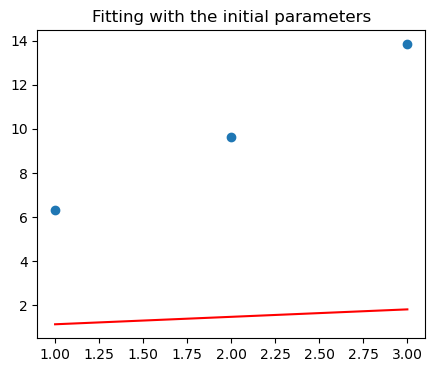

In [94]:
#Initial fitting 
y_hat = X * m.item() + b #prediction
plt.figure(figsize=(5, 4))
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), y_hat.detach().numpy(), c='r') # detach() creates a new tensor that does not require gradient tracking
plt.title("Fitting with the initial parameters")
plt.show();

In [95]:
a = X * m
a.retain_grad()

y_hat = a + b
y_hat.retain_grad()

d = y - y_hat
d.retain_grad()

loss = torch.sum(1 / 2 * (d ** 2)) # SSE

In [96]:
loss.backward() # compute gradients of m and b wrt loss

In [97]:
d.grad, d

(tensor([ 5.1878,  8.1619, 12.0147]),
 tensor([ 5.1878,  8.1619, 12.0147], grad_fn=<SubBackward0>))

In [98]:
y_hat.grad, -d

(tensor([ -5.1878,  -8.1619, -12.0147]),
 tensor([ -5.1878,  -8.1619, -12.0147], grad_fn=<NegBackward0>))

In [99]:
b.grad, -d.sum()

(tensor([-25.3644]), tensor(-25.3644, grad_fn=<NegBackward0>))

In [100]:
a.grad, -d

(tensor([ -5.1878,  -8.1619, -12.0147]),
 tensor([ -5.1878,  -8.1619, -12.0147], grad_fn=<NegBackward0>))

In [101]:
m.grad, torch.sum(-d * X)

(tensor([-57.5557]), tensor(-57.5557, grad_fn=<SumBackward0>))

In [102]:
#One GD step with learning rate = 0.1 
alpha = 0.1
m.data -= alpha * m.grad
b.data -= alpha * b.grad

# Clear the gradients so that they don't get carried over
m.grad.zero_()
b.grad.zero_()

# Let's see how we are doing
m.item(), b.item()

(6.093218803405762, 3.3454127311706543)

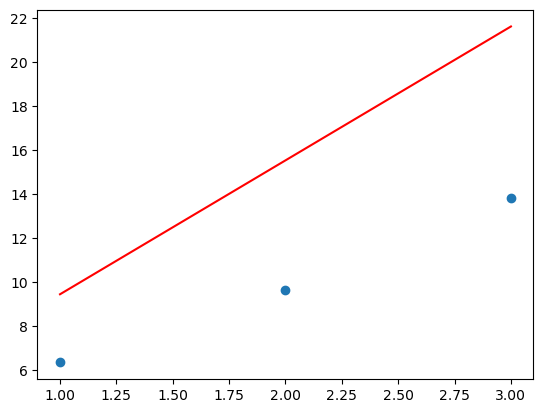

In [103]:
y_hat = X * m.item() + b
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), y_hat.detach().numpy(), c='r');

In [104]:
# Do more gradient descent steps
def step(X, y, m, b, lr):
    # do the forward pass
    y_hat = m * X + b

    # calculate the loss
    loss = 1/2 * (y_hat - y).pow(2).sum()

    # compute the gradient of the loss wrt parameters
    loss.backward()

    # update the model parameters
    m.data -= lr * m.grad
    b.data -= lr * b.grad

    # clear the gradients
    m.grad.zero_()
    b.grad.zero_()

    return m, b, loss

In [105]:
alpha=0.1
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
frames = []

for i in range(15):
    m, b, loss = step(X, y, m, b, alpha)
    yhat = m * X + b
    frames.append(plot_f(X, y, yhat, loss))

gif.save(frames, "grad_descent.gif", duration=1000)
print(m.item())
print(b.item())

3.787142038345337
2.3737199306488037


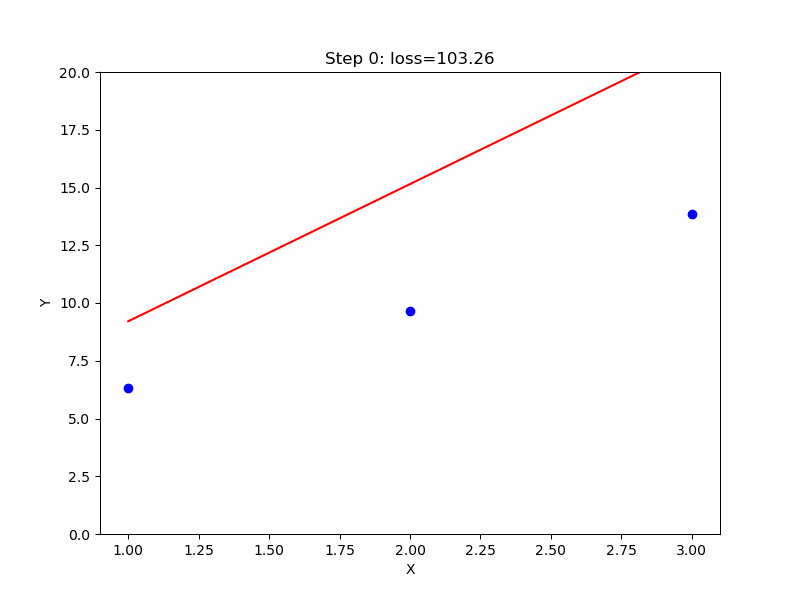

In [106]:
from IPython.display import Image, display

display(Image(filename='grad_descent.gif'))

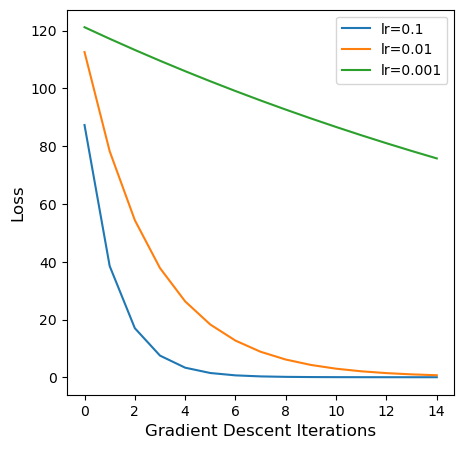

In [107]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

alphas=[0.1, 0.01, 0.001]
torch.random.manual_seed(42)

for a in alphas:
  loss_arr = np.ones(15)
  m = torch.rand(1, requires_grad=True)
  b = torch.rand(1, requires_grad=True)

  for i in range(15):
      m, b, loss = step(X, y, m, b, a)
      loss_arr[i] = loss
  ax.plot(loss_arr, label=f'lr={a}')

ax.set_xlabel('Gradient Descent Iterations', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend()

In [108]:
#Recap
from sklearn.datasets import load_diabetes
data = load_diabetes(scaled=True)

In [109]:
# how big is this dataset?
print(data.data.shape)

# these are independent variables used in the prediction
# print(load_diabetes().DESCR) provides more info on the variables
print(data.feature_names)

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [110]:
# what does the entry for each patient tell us?
for i,n in enumerate(data.data[0]):
  print(f'{data.feature_names[i]} \t {n}')

# this is how it actually appears in the data array
print(data.data[0])

# what the disease progression for patient 0?
print(data.target[0])

age 	 0.038075906433423026
sex 	 0.05068011873981862
bmi 	 0.061696206518683294
bp 	 0.0218723855140367
s1 	 -0.04422349842444599
s2 	 -0.03482076283769895
s3 	 -0.04340084565202491
s4 	 -0.002592261998183278
s5 	 0.019907486170462722
s6 	 -0.01764612515980379
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression


# split the data into a training set and test set, here we reserve 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


# scale the data using Standard Scaler
x_scaler = StandardScaler() # Centers mean and scales to unit variance
X_train_scaled = x_scaler.fit_transform(X_train) #fit_transform combines "fit" and "transform"
X_test_scaled = x_scaler.transform(X_test)


# fit our linear regression model!
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
import numpy as np

# let's see the weights for all our attributes
coeff = np.round(lm.coef_, 2)
for i,n in enumerate(coeff):
  print(f'{data.feature_names[i]} \t {n}')

# this is our linear regression equation
print(f'\ny_pred = {coeff[0]}(x_0) + {coeff[1]}(x_1) + ... {coeff[-1]}(x_9) + {lm.intercept_}')

age 	 1.75
sex 	 -11.51
bmi 	 25.61
bp 	 16.83
s1 	 -44.45
s2 	 24.64
s3 	 7.68
s4 	 13.14
s5 	 35.16
s6 	 2.35

y_pred = 1.75(x_0) + -11.51(x_1) + ... 2.35(x_9) + 153.73654390934846


In [113]:
# lm.predict just evaluates our line for the given samples
print(lm.predict(X_train[0].reshape(1,-1))[0])
print(np.sum(lm.coef_ * X_train[0]) + 153.73654390934846)

y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)

155.3377176896918
155.3377176896918


Test MSE: 2900.1936284934823
Test MAE: 42.79409467959994
Test R2: 0.45260276297191926


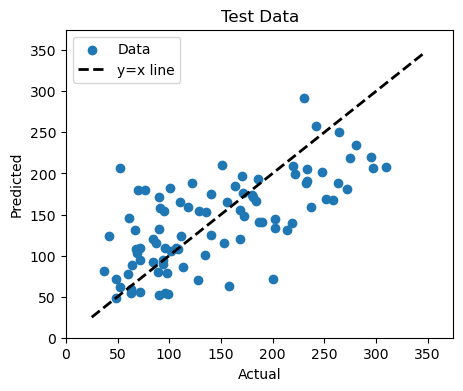

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# we can measure model performance with multiple error metrics
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Test R2: {lm.score(X_test_scaled, y_test)}")

# we can also visualize our predictions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (5,4))

y = data.target
ax.scatter(y_test, y_pred_test, label='Data')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='y=x line')
ax.set_title("Test Data")
ax.legend()

ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_xticks(np.arange(0, 400, 50))
ax.set_yticks(np.arange(0, 400, 50))
ax.set_xlim(0,375);
ax.set_ylim(0,375);

In [115]:
The linear regression model in sklearn minimizes the residual sum of squares  between the predicted target $\hat{y}$ and the actual target $y$.

$$\mathcal{L} = \sum^n_{i=1}(y_i - \hat{y_i})^2 = \Vert \mathbf{y} - \mathbf{X} \mathbf{\theta} \Vert^2 $$

The optimal parameters are therefore:
$$ \hat{\theta} = \text{arg} \min_{\theta} \Vert \mathbf{y} - \mathbf{X} \mathbf{\theta} \Vert^2 $$

If we write this as a matrix multiplication, $\mathbf{X} \mathbf{\theta} = \mathbf{y}$ we see that this is just a system of linear equations.  This system has way more equations than unknowns, so we call it *over-determined*.

$$
\begin{bmatrix} 1 & \mathbf{x}_1\\ 1 & \mathbf{x}_2 \\ \vdots & \vdots \\ 1 & \mathbf{x}_n \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix} = \begin{bmatrix} \mathbf{y}_1 \\ \mathbf{y}_2 \\ \vdots \\ \mathbf{y}_n \end{bmatrix}
$$

To give us a system with an equal number of equations and unknowns, we multiply both sides by $\mathbf{X}^T$, which gives us $(\mathbf{X}^T \mathbf{X}) \; \hat{\theta} = \mathbf{X}^T \mathbf{y}$, something we can actually solve.

Since this minimization has a unique, closed form solution, we can compute the optimal parameters in one step: $\hat{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \; \mathbf{X}^T \mathbf{y}$. But, what if we instead use gradient descent?


SyntaxError: invalid syntax (1918837804.py, line 1)

In [ ]:
#If we use gradient descent instead 
frames = []
m = torch.rand(10, requires_grad=True)
b = torch.rand(1, requires_grad=True)
m, b

for i in range(20):
  # Forward pass
  a = torch.sum(torch.tensor(X_train_scaled) * m, dim=1)
  a.retain_grad()

  y_hat = a + b
  y_hat.retain_grad()

  d = torch.tensor(y_train) - y_hat
  d.retain_grad()

  # Calculate loss
  loss = torch.sum(d ** 2) / d.shape[0] # MSE

  # Clear the gradients so that they don't get carried over
  if i > 0:
    m.grad.zero_()
    b.grad.zero_()

  # Compute gradients
  loss.backward()

  # Update model parameters
  alpha = 0.2
  m.data -= alpha * m.grad
  b.data -= alpha * b.grad

  if (i) % 2 == 0:
    y_pred = np.sum(X_test_scaled * m.detach().numpy(), axis=1) + b.item()
    frames.append(plot_gd(X_test_scaled, y_test, y_pred, loss))

gif.save(frames, "diabetes_gd.gif", duration=1000)

In [ ]:
from IPython.display import Image, display

display(Image(filename='diabetes_gd.gif'))

In [116]:
class dog:
  def __init__(self, owner, energy):
    self.energy = energy
    self.owner = owner

  def walk(self, walk_length):
    self.energy -= 0.5 * walk_length # time in minutes

  def eat_treats(self, num_treats):
    self.energy += 10 * num_treats

  def bark(self):
    print(f'ruff! {self.owner} pay attention to me!')

In [117]:
Pakora = dog('Pratyush', 200)
Spot = dog('Lukas', 100)

Pakora.bark()

Pakora.walk(60)
print(Pakora.energy)

Pakora.eat_treats(1)
print(Pakora.energy)

ruff! Pratyush pay attention to me!
170.0
180.0


In [118]:
#Subclass
class puppy(dog):
  def __init__(self, breed, owner, energy):
      super(puppy, self).__init__(owner, energy)
      self.breed = breed

  def walk(self, walk_length):
    if walk_length > 20:
      print("too far! I'm too little!")

In [119]:
Rex = puppy('Border Collie', 'Sanjay', 500)
Rex.walk(60)
Rex.bark()

print(Rex.breed)

too far! I'm too little!
ruff! Sanjay pay attention to me!
Border Collie


In [120]:
#Deep learning 
import torch.nn as nn

# Custom model inheriting from torch.nn.Module
class myModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(myModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

In [121]:
#Single Variable Regression
def tensor_to_numpy(tensor):
  return tensor.detach().cpu().numpy()

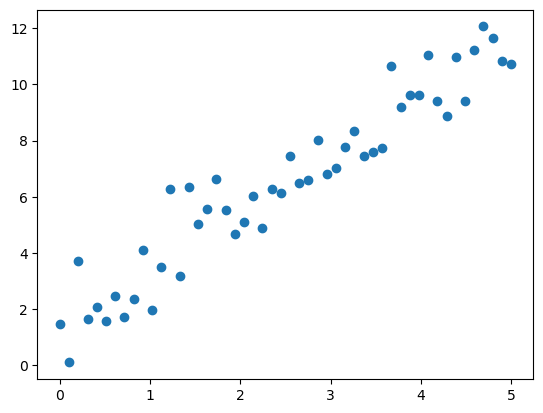

In [122]:
# Create a simple dataset
X = torch.linspace(0, 5, 50)
y = 2 * X + 1.5 + torch.randn(50)

plt.scatter(tensor_to_numpy(X), tensor_to_numpy(y));

In [123]:
import torch.nn as nn

class SingleVariableLinearRegression(nn.Module): # All models must inherit nn.Module
  def __init__(self):
    super().__init__()
    # use random values as initial parameter value
    # set requires_grad=True to let pytorch track their gradients
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

  # Override forward function to define how prediction is made by the model
  def forward(self, x):
    return self.weight * x + self.bias

In [124]:
net = SingleVariableLinearRegression()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [125]:
import gif
import gif_utils

epochs = 50
frames = []

for i in range(epochs):
  net.train() # Set the model to training mode

  # do the forward pass
  out = net(X)

  # calculate the loss
  loss_value = loss(out, y)

  # clear the previous gradients
  optimizer.zero_grad()

  # compute the gradient with respect to the loss
  loss_value.backward()

  # update the model parameters
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['weight'].item()
  b = state_dict['bias'].item()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
        title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "single_variable_lr.gif", duration=1000)

Epoch 10/50, Loss: 2.8984
Epoch 20/50, Loss: 0.9785
Epoch 30/50, Loss: 0.9028
Epoch 40/50, Loss: 0.8924
Epoch 50/50, Loss: 0.8889


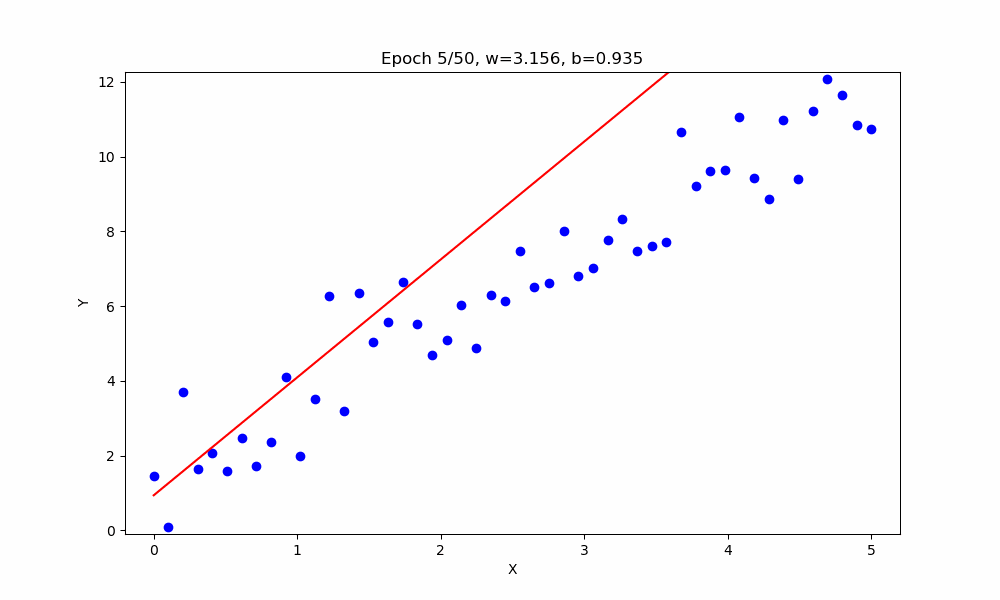

In [126]:
from IPython.display import Image, display

display(Image(filename='single_variable_lr.gif'))

In [127]:
layer = nn.Linear(in_features=6, out_features=2)
layer.weight, layer.bias

(Parameter containing:
 tensor([[-0.2746,  0.1654,  0.1462,  0.3392, -0.2108, -0.2783],
         [ 0.2166, -0.1650,  0.2478, -0.0969,  0.2335, -0.3172]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.2060,  0.1245], requires_grad=True))

In [128]:
import torch.nn as nn

class SingleVariableLinearRegressionWithNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [129]:
net = SingleVariableLinearRegressionWithNN()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [130]:
epochs = 50

net.train()
frames = []

X = X.view(-1, 1) # Remember our X should of shape (N, in_dim), or (N, 1) here
y = y.view(-1, 1)

for i in range(epochs):
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['linear.weight'].item()
  b = state_dict['linear.bias'].item()

  frames.append(gif_utils.plot_frame(X, y, net, i,
    title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "single_variable_lr_with_linear.gif", duration=1000)

Epoch 10/50, Loss: 2.8355
Epoch 20/50, Loss: 0.9812
Epoch 30/50, Loss: 0.9045
Epoch 40/50, Loss: 0.8931
Epoch 50/50, Loss: 0.8892


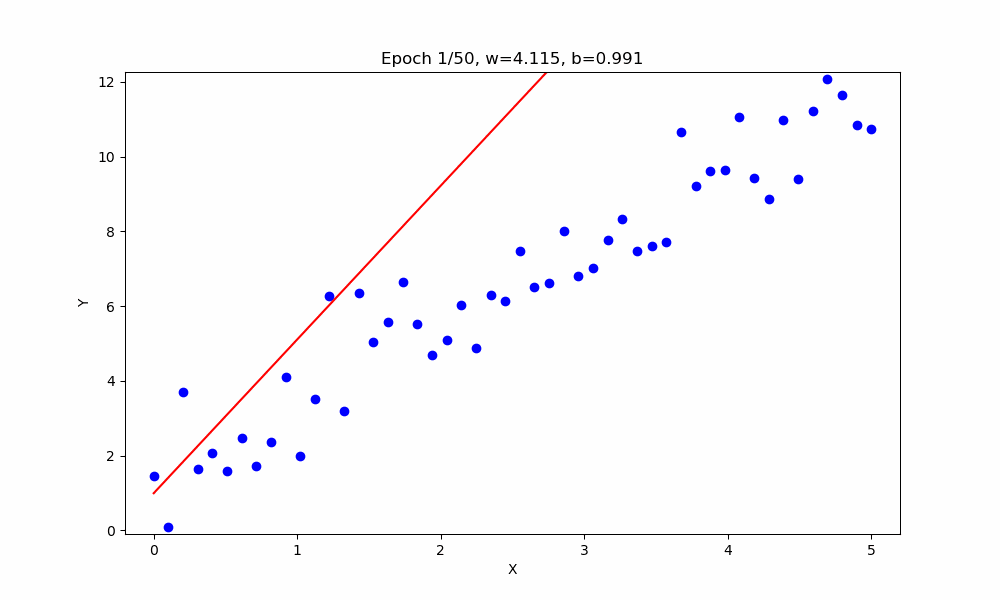

In [131]:
display(Image(filename='single_variable_lr_with_linear.gif'))

In [132]:
#Non-linear stuff
!wget https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/energy_data.csv

--2025-10-22 12:29:55--  https://raw.githubusercontent.com/qzheng75/PyTorch-bootcamp/main/1-Lecture-one-files/energy_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131 (1.1K) [text/plain]
Saving to: ‘energy_data.csv.5’

energy_data.csv.5   100%[===================>]   1.10K  --.-KB/s    in 0s      

2025-10-22 12:29:55 (180 MB/s) - ‘energy_data.csv.5’ saved [1131/1131]



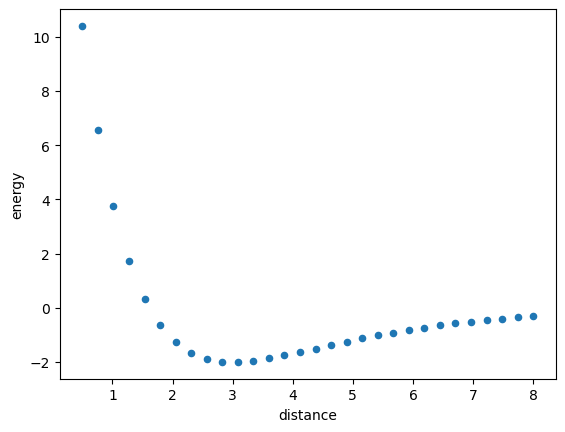

In [133]:
# Load data
import pandas as pd

df = pd.read_csv("energy_data.csv")
df.plot(x="distance", y="energy", kind="scatter");

In [134]:
net = SingleVariableLinearRegressionWithNN()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

Epoch 10/50, Loss: 6.0388
Epoch 20/50, Loss: 6.0034
Epoch 30/50, Loss: 5.9711
Epoch 40/50, Loss: 5.9413
Epoch 50/50, Loss: 5.9139


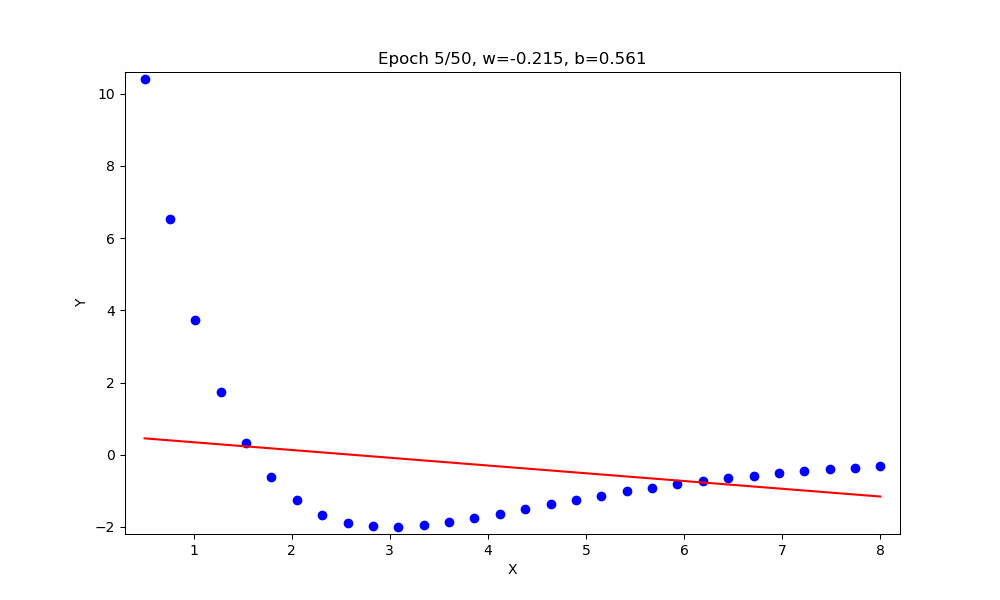

In [135]:
# Remember loading numpy arrays to tensors result in torch.float64
# while matrices in nn.Linear are of type torch.float32
X = torch.tensor(df['distance'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df['energy'].values, dtype=torch.float32).view(-1, 1)

epochs = 50
frames = []

X = X.view(-1, 1) # Remember our X should be of shape (N, in_dim), or (N, 1) here
y = y.view(-1, 1)

for i in range(epochs):
  net.train()
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}')

  state_dict = net.state_dict()
  w = state_dict['linear.weight'].item()
  b = state_dict['linear.bias'].item()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
      title=f"Epoch {i+1}/{epochs}, w={w:.3f}, b={b:.3f}"))

gif.save(frames, "linear_model_energy.gif", duration=1000)
display(Image(filename='linear_model_energy.gif'))

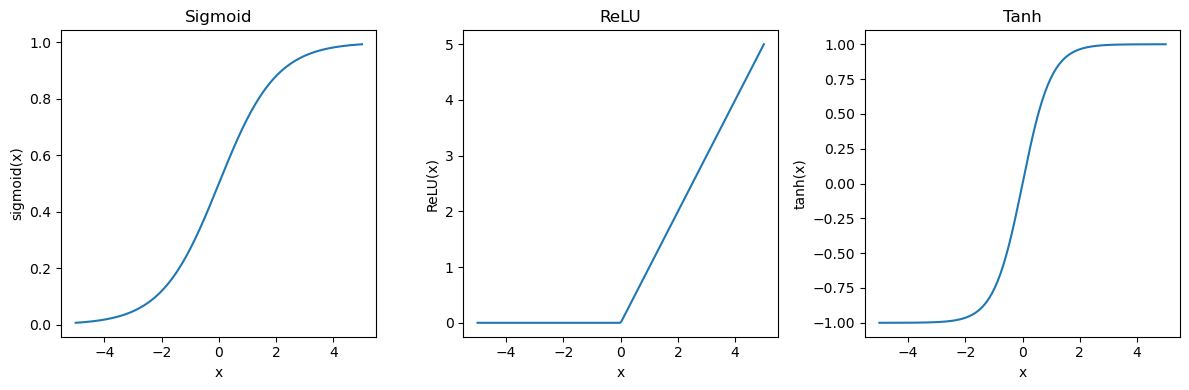

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 200)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Sigmoid
ax1.plot(x, sigmoid(x))
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('sigmoid(x)')

# ReLU
ax2.plot(x, relu(x))
ax2.set_title('ReLU')
ax2.set_xlabel('x')
ax2.set_ylabel('ReLU(x)')

# Tanh
ax3.plot(x, tanh(x))
ax3.set_title('Tanh')
ax3.set_xlabel('x')
ax3.set_ylabel('tanh(x)')

plt.tight_layout()
plt.show()

In [137]:
class NonLinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Sequential to aggregate multiple modules, simplifies defining the forward function
    self.layers = nn.Sequential(
        nn.Linear(in_features=1, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=1),
    )

  def forward(self, X):
    return self.layers(X)

In [138]:
net = NonLinearModel()
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
net

NonLinearModel(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

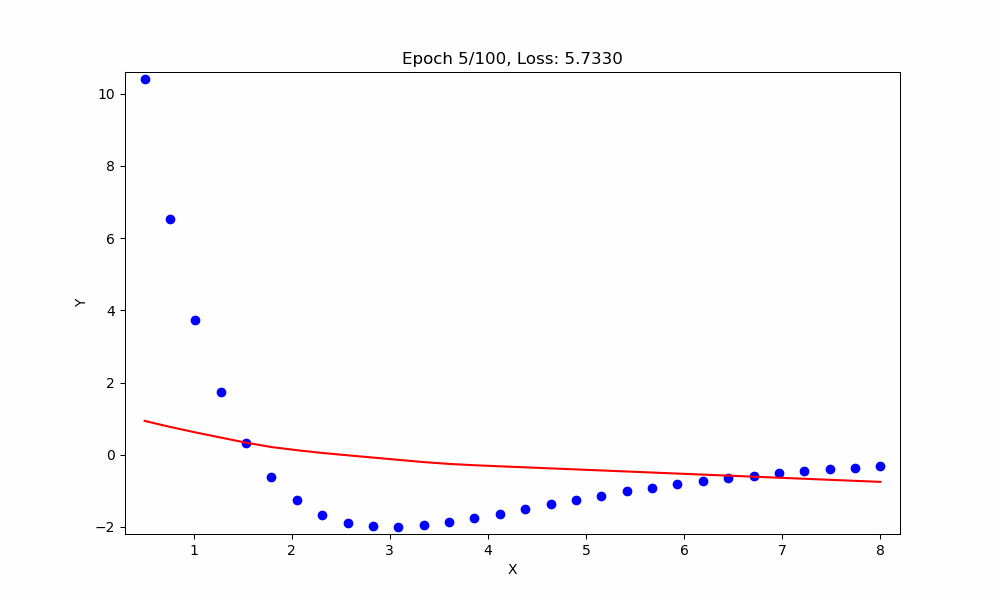

In [139]:
X = torch.tensor(df['distance'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df['energy'].values, dtype=torch.float32).view(-1, 1)

epochs = 100
frames = []

for i in range(epochs):
  net.train()
  out = net(X)
  loss_value = loss(out, y)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

  if (i+1) % 5 == 0:
    frames.append(gif_utils.plot_frame(X, y, net, i,
                                     title=f'Epoch {i+1}/{epochs}, Loss: {loss_value.item():.4f}'))

gif.save(frames, "nonlinear_model_energy.gif", duration=500)
display(Image(filename='nonlinear_model_energy.gif'))